In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 4/1AY0e-g7JyIk_37jO-ToWtN5s-O1OmGcyzTmwe0BYDmFHg4P6wBYJNTFPjvs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
import csv

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/failure_pred.csv")
df

,ProdID,AirTemp,ProcTemp,Rotation,Torque,ToolWear,Failure
0,L47181,298.2,308.7,1408,46.3,3,0
1,L47182,298.1,308.5,1498,49.4,5,0
2,L47183,298.2,308.6,1433,39.5,7,0
3,L47184,298.2,308.7,1408,40.0,9,0
4,L47186,298.1,308.6,1558,42.4,14,0
...,...,...,...,...,...,...,...
5995,L57168,298.9,308.6,1771,24.1,213,0
5996,L57170,298.8,308.5,1527,36.2,3,0
5997,L57172,298.8,308.4,1484,39.2,8,0
5998,L57173,298.8,308.4,1401,47.3,10,0


In [4]:
df.head(40)

,ProdID,AirTemp,ProcTemp,Rotation,Torque,ToolWear,Failure
0,L47181,298.2,308.7,1408,46.3,3,0
1,L47182,298.1,308.5,1498,49.4,5,0
2,L47183,298.2,308.6,1433,39.5,7,0
3,L47184,298.2,308.7,1408,40.0,9,0
4,L47186,298.1,308.6,1558,42.4,14,0
5,L47187,298.1,308.6,1527,40.2,16,0
6,L47194,298.6,309.2,2035,19.6,40,0
7,L47195,298.6,309.2,1542,48.4,42,0
8,L47201,298.8,309.3,1450,44.8,63,0
9,L47203,299.0,309.4,1758,25.7,68,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ProdID    6000 non-null   object 
 1   AirTemp   6000 non-null   float64
 2   ProcTemp  6000 non-null   float64
 3   Rotation  6000 non-null   int64  
 4   Torque    6000 non-null   float64
 5   ToolWear  6000 non-null   int64  
 6   Failure   6000 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 328.2+ KB


In [6]:
df.describe()

,AirTemp,ProcTemp,Rotation,Torque,ToolWear,Failure
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,300.015833,310.012300,1539.469167,39.996600,108.378833,0.039167
std,1.987453,1.475247,180.428518,10.012335,64.058238,0.194008
min,295.300000,305.700000,1181.000000,3.800000,0.000000,0.000000
25%,298.400000,308.800000,1424.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1504.000000,40.000000,109.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,163.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,251.000000,1.000000


In [7]:
from matplotlib import pyplot as plot

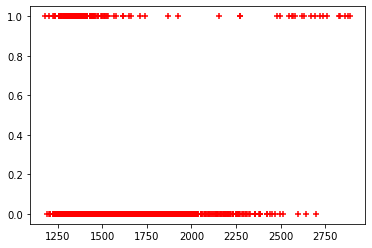

In [9]:
plot.scatter(df['Rotation'], df['Failure'], marker='+', color='red')

In [10]:
features = ['AirTemp', 'ProcTemp', 'Rotation', 'ToolWear']

In [11]:
X = df[features]

In [12]:
y = df['Failure']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [14]:
X_test

,AirTemp,ProcTemp,Rotation,ToolWear
1483,299.0,308.5,1604,159
2185,302.1,311.3,1634,50
2520,302.3,310.8,1723,213
3721,301.0,311.0,1437,33
3727,300.9,310.8,1729,53
...,...,...,...,...
2537,302.2,310.9,1452,56
1012,298.0,307.7,1430,49
5116,298.3,309.5,1542,134
1807,300.5,309.6,1390,194


In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [16]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# [[310, 2800, 60, 230]] -> 1
# [[310, 1539, 39, 108]] -> 0
# [[300, 1000, 5, 0]] -> 0
prediction = model.predict([[309, 1410, 65.7, 108]])
prediction

array([0])

In [20]:
model.score(X_test, y_test)

0.9577777777777777